# 와인 품질 예측 모델 만들기 선형회귀 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 와인 품질 데이터 프레임 준비

In [2]:
# 레드와인 데이터 로드
redwine = pd.read_csv('C:/Users/Yoo/Documents/Study/Bigdata center/data/wine/winequality_red.csv',sep=';',header=0)
redwine['type'] = 'red'

# 화이트와인 데이터 로드
whitewine = pd.read_csv('C:/Users/Yoo/Documents/Study/Bigdata center/data/wine/winequality_white.csv',sep=';',header=0)
whitewine['type'] = 'white'

# 레드, 화이트 와인 데이터 합치기
wine = redwine.append(whitewine)

# 변수명의 띄어쓰기 _로 변환
wine.columns = wine.columns.str.replace(' ',"_")
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 선형회귀 모델의 적용(규제가 없는 선형회귀 모델)

In [3]:
# 모델 클래스와 모델 파라미터의 선택
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # fit_intercept ==> 상수항 여부
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
# 특징행렬(ndarray 2차원)과 대상 벡터(ndarray 1차원)의 추출
X = wine.drop(['type','quality'], axis=1)
y = wine.quality
X.shape, y.shape

((6497, 11), (6497,))

In [5]:
# 훈련 데이터와 테스트 데이터의 분리(특징행렬이 대문자인 의미 -> 2차원임을 암시)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1) # size 미지정시(3:1로 나눠짐)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 11), (1625, 11), (4872,), (1625,))

In [6]:
# 모델의 데이터 적합(coef, intercept 등을 값을 얻게 됨)
# 파라미터 -> 학습과정에서 자동으로 설정되는 매개변수 // 하이퍼파라미터 -> 개발자가 모델을 컨트롤하기 위해 제어하기 위해 사용하는 값
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model.coef_, X_train.columns

(array([ 5.55618691e-02, -1.29945358e+00, -1.08205046e-01,  4.52070539e-02,
        -3.95901596e-01,  5.76479819e-03, -2.47760359e-03, -5.30023471e+01,
         3.50283862e-01,  7.49149475e-01,  2.78530060e-01]),
 Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
        'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
        'pH', 'sulphates', 'alcohol'],
       dtype='object'))

In [8]:
model.intercept_

54.05800385466585

In [9]:
# 모델을 새로운 데이터에 적용
newdata = np.array([6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.994, 3.3, 0.49, 9.5])

In [10]:
model.predict(np.reshape(newdata, (1,11)))

array([5.27273597])

In [11]:
y_pred = model.predict(X_test)
y_pred.shape

(1625,)

### 선형회귀 모델의 성능측정

In [12]:
# 방법1 직접 함수 만들기
def rmse(y_real, y_pred):
    return np.sqrt(np.mean((y_real - y_pred)**2))

np.round(rmse(y_test, y_pred),2)

0.73

In [13]:
# 방법2 모듈 불러오기
from sklearn.metrics import mean_squared_error

np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)

0.73

### 규제가 있는 선형회귀 모델(릿지, 라쏘, 엘라스팅넷)
- 과분산 모델에 대해 모델을 규제하여 오버피팅을 감소
- 규제는 오버피팅된 파라미터 값에 대해 페널티를 부여(계수가 작아짐)
- 페널티는 편향을 높이는 것(훈련 데이터와의 적합도는 떨어지나 전체적 결과는 좋아짐)
- 릿지는 가중치가 0이 되는 경우는 없지만 라쏘는 0을 만듬
- 엘라스팅넷은 릿지와 라쏘를 합친 것으로 어떤 기능을 쓰냐에 따라 릿지 or 라쏘가 됨

In [14]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.05) # 규제와 관련있는 하이퍼파라미터(0이면 기본 선형회귀모델과 동일)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.727

In [15]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.761

Text(0.5, 1.0, 'ridge:alpha = 0.05, rmse = 0.727')

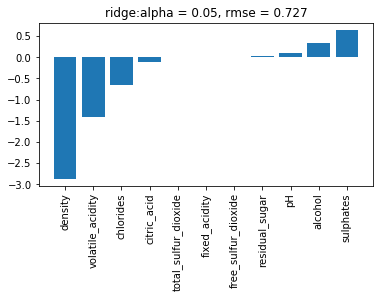

In [16]:
# 리지 회귀 모델 시각화
from sklearn.linear_model import Ridge

model_name = 'ridge'
alpha = 0.05
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
coef = pd.Series(data=ridge.coef_,index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values) # bar chart => X는 coef.index, y는 coef.values
ax.set_xticklabels(coef.index, rotation=90) # rotation 회전
ax.set_title('{0}:alpha = {1}, rmse = {2}'.format(model_name, alpha, rmse))

Text(0.5, 1.0, 'lasso:alpha = 1, rmse = 0.855')

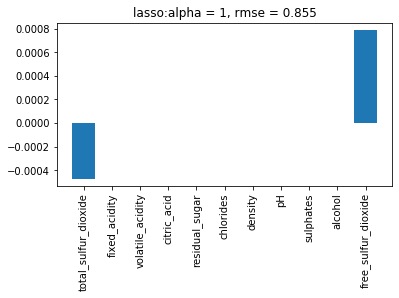

In [17]:
# 라쏘 회귀 모델 시각화
from sklearn.linear_model import Lasso

model_name = 'lasso'
alpha = 1
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
coef = pd.Series(data=lasso.coef_,index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values) # bar chart => X는 coef.index, y는 coef.values
ax.set_xticklabels(coef.index, rotation=90) # rotation 회전
ax.set_title('{0}:alpha = {1}, rmse = {2}'.format(model_name, alpha, rmse))